In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(313)

In [2]:
n_samples = 100

In [3]:
data = np.arange(n_samples)
data.shape

(100,)

In [4]:
X = np.column_stack([data, data + np.random.randint(10,50,data.shape[0])])
X.shape

(100, 2)

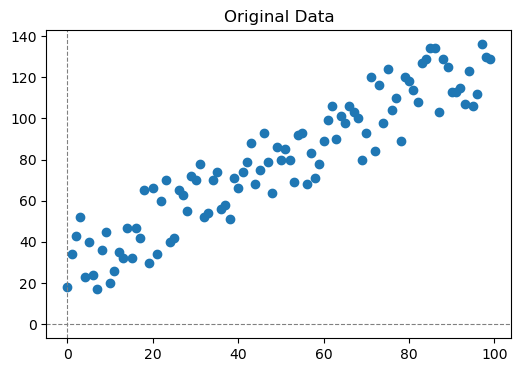

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Add horizontal axis
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # Add vertical axis
plt.title('Original Data')
plt.show()

In [6]:
X_std = (X - np.mean(X,axis=0)) / np.std(X,axis=0)
X_std.shape

(100, 2)

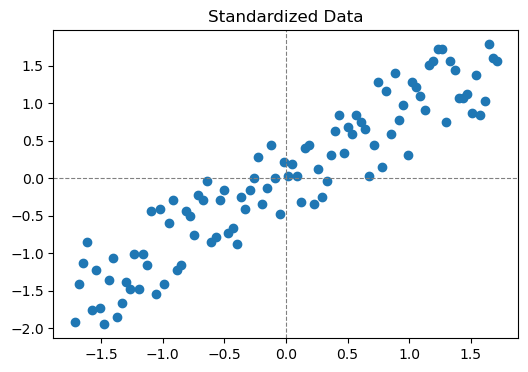

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(X_std[:, 0], X_std[:, 1])
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Add horizontal axis
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # Add vertical axis
plt.title('Standardized Data')
plt.show()

In [8]:
n = X_std.shape[0]-1

C = (1/n) * (X_std.T @ X_std)
C.shape

(2, 2)

In [9]:
C

array([[1.01010101, 0.944149  ],
       [0.944149  , 1.01010101]])

<Axes: >

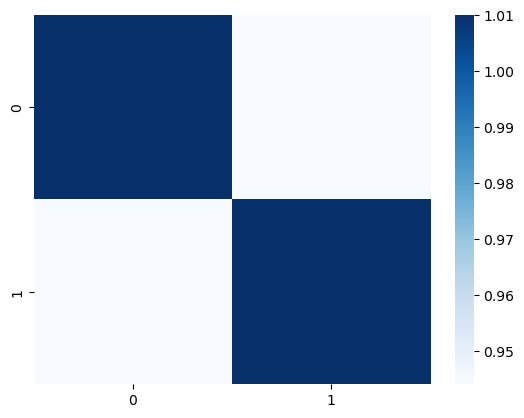

In [10]:
sns.heatmap(C,cmap='Blues')

In [11]:
eigen_values, eigen_vectors = np.linalg.eig(C)
eigen_values.shape, eigen_vectors.shape

((2,), (2, 2))

In [12]:
eigen_values

array([1.95425001, 0.06595201])

In [13]:
eigen_vectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [14]:
indices = np.argsort(-eigen_values)
indices

array([0, 1])

In [15]:
eigen_values = eigen_values[indices]
eigen_vectors = eigen_vectors[:,indices]

In [16]:
eigen_values

array([1.95425001, 0.06595201])

In [17]:
eigen_values / np.sum(eigen_values)

array([0.96735376, 0.03264624])

In [18]:
k = 1
eigen_values = eigen_values[:k]
eigen_vectors = eigen_vectors[:,:k]

In [22]:
X_dim_reduced = X_std @ eigen_vectors
X_dim_reduced.shape

(100, 1)

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(X_dim_reduced, np.zeros_like(X_dim_reduced))
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Add horizontal axis
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)  # Add vertical axis
plt.title('Dimension Reduced Data')
plt.show()